In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

In [3]:
df = pd.read_csv("../data/laptop_prices_preprocessed.csv")

In [65]:
# Mostrar los primeros 5 registros del DataFrame
print("Primeros 5 registros del DataFrame:")
df.head()

Primeros 5 registros del DataFrame:


,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,...,CPU_company_Samsung,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,13.3,8.0,1.37,1339.69,2560.0,1600.0,2.3,128.0,0.0,True,...,False,False,False,True,False,True,False,False,True,False
1,13.3,8.0,1.34,898.94,1440.0,900.0,1.8,128.0,0.0,True,...,False,False,False,False,False,True,False,False,True,False
2,15.6,8.0,1.86,575.00,1920.0,1080.0,2.5,256.0,0.0,False,...,False,False,False,True,False,True,False,False,True,False
3,15.4,16.0,1.83,2537.45,2880.0,1800.0,2.7,512.0,0.0,True,...,False,False,False,True,False,True,False,False,False,False
4,13.3,8.0,1.37,1803.60,2560.0,1600.0,3.1,256.0,0.0,True,...,False,False,False,True,False,True,False,False,True,False


In [66]:
# Mostrar información del DataFrame
print("Información del DataFrame:")
df.info()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Inches                       1275 non-null   float64
 1   Ram                          1275 non-null   float64
 2   Weight                       1275 non-null   float64
 3   Price_euros                  1275 non-null   float64
 4   ScreenW                      1275 non-null   float64
 5   ScreenH                      1275 non-null   float64
 6   CPU_freq                     1275 non-null   float64
 7   PrimaryStorage               1275 non-null   float64
 8   SecondaryStorage             1275 non-null   float64
 9   Company_Apple                1275 non-null   bool   
 10  Company_Asus                 1275 non-null   bool   
 11  Company_Chuwi                1275 non-null   bool   
 12  Company_Dell                 1275 non-null   bool

In [67]:
# Mostrar los tipos de datos
print("Tipos de datos en cada columna:")
print(df.dtypes)

Tipos de datos en cada columna:
Inches                         float64
Ram                            float64
Weight                         float64
Price_euros                    float64
ScreenW                        float64
ScreenH                        float64
CPU_freq                       float64
PrimaryStorage                 float64
SecondaryStorage               float64
Company_Apple                     bool
Company_Asus                      bool
Company_Chuwi                     bool
Company_Dell                      bool
Company_Fujitsu                   bool
Company_Google                    bool
Company_HP                        bool
Company_Huawei                    bool
Company_LG                        bool
Company_Lenovo                    bool
Company_MSI                       bool
Company_Mediacom                  bool
Company_Microsoft                 bool
Company_Razer                     bool
Company_Samsung                   bool
Company_Toshiba                 

In [68]:
# Mostrar estadísticas descriptivas generales
print("Estadísticas descriptivas generales:")
df.describe()

Estadísticas descriptivas generales:


,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [ ]:
# Modelos Supervisados

# Preparación de los datos

# Separar variables predictoras y variable objetivo
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

# Conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las variables predictoras
scaler = StandardScaler()

numeric_cols = ['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Mostrar las formas de los conjuntos resultantes
print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")

Datos de entrenamiento: (1020, 56), (1020,)
Datos de prueba: (255, 56), (255,)


In [ ]:
# Regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluación del modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Imprimir resultados
print(f"Error Cuadrático Medio: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R²: {r2_score(y_test, y_pred_lr)}")

Error Cuadrático Medio: 116404.71720365706
R²: 0.7654734913785265


In [71]:
# Visualización de resultados
df_pred_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr, 'Error': y_test - y_pred_lr}) 
df_pred_lr 

,Actual,Predicted,Error
1179,650.0,603.350036,46.649964
342,716.0,985.170561,-269.170561
649,1584.0,1497.196443,86.803557
772,1020.0,791.862889,228.137111
803,1749.0,1494.645073,254.354927
...,...,...,...
701,399.0,614.410502,-215.410502
1105,1413.1,1687.674576,-274.574576
424,2799.0,2632.268739,166.731261
944,1299.0,1119.894832,179.105168


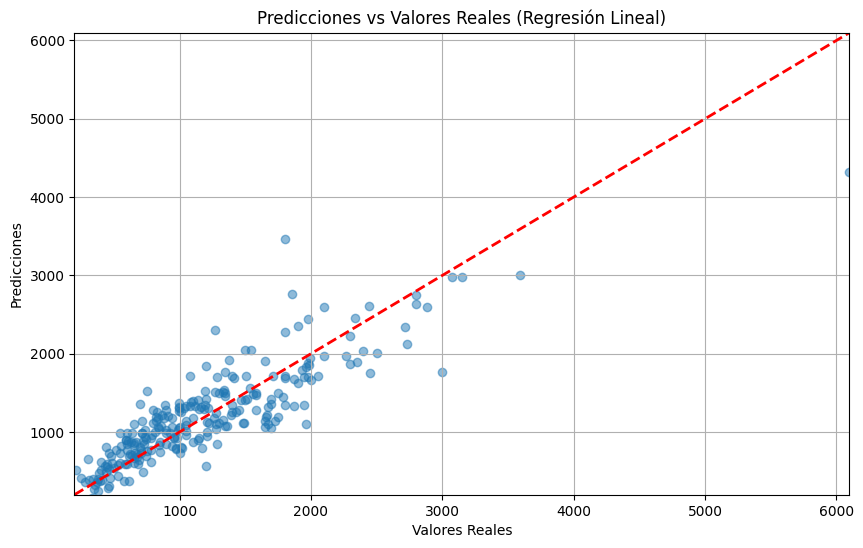

In [72]:
# Grafica de predicciones vs valores reales para regresión lineal
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicciones vs Valores Reales (Regresión Lineal)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

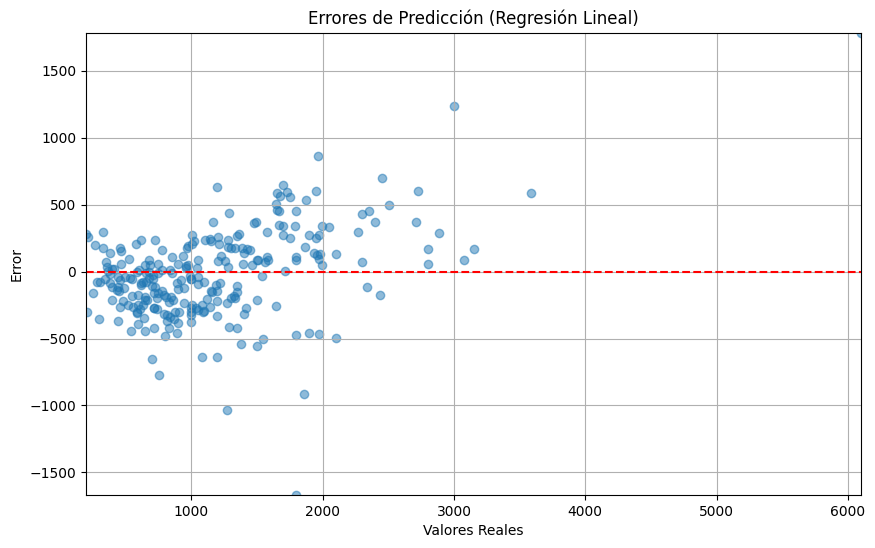

In [73]:
# Grafica de errores para regresión lineal
plt.figure(figsize=(10, 6))
plt.scatter(y_test, df_pred_lr['Error'], alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Errores de Predicción (Regresión Lineal)')
plt.xlabel('Valores Reales')
plt.ylabel('Error')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(df_pred_lr['Error'].min(), df_pred_lr['Error'].max())
plt.grid()
plt.show()

In [74]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluación del modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Imprimir resultados
print(f"Error Cuadrático Medio: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R²: {r2_score(y_test, y_pred_rf)}")

Error Cuadrático Medio: 74814.16893884137
R²: 0.8492680858805237


In [75]:
# Visualización de resultados
df_pred_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf, 'Error': y_test - y_pred_rf})
df_pred_rf

,Actual,Predicted,Error
1179,650.0,866.129875,-216.129875
342,716.0,870.921900,-154.921900
649,1584.0,1661.305100,-77.305100
772,1020.0,730.499600,289.500400
803,1749.0,1667.600200,81.399800
...,...,...,...
701,399.0,457.176500,-58.176500
1105,1413.1,1350.369400,62.730600
424,2799.0,2936.749407,-137.749407
944,1299.0,1434.034750,-135.034750


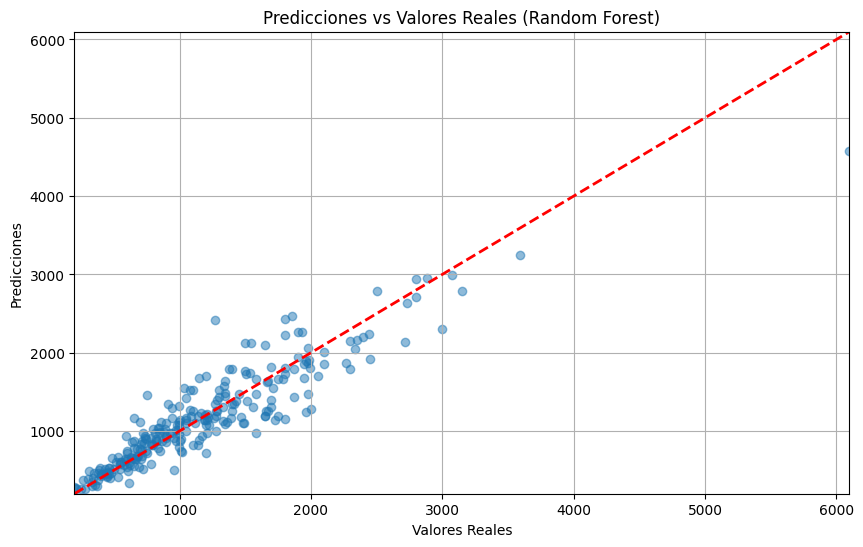

In [76]:
# Grafica de predicciones vs valores reales para Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicciones vs Valores Reales (Random Forest)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

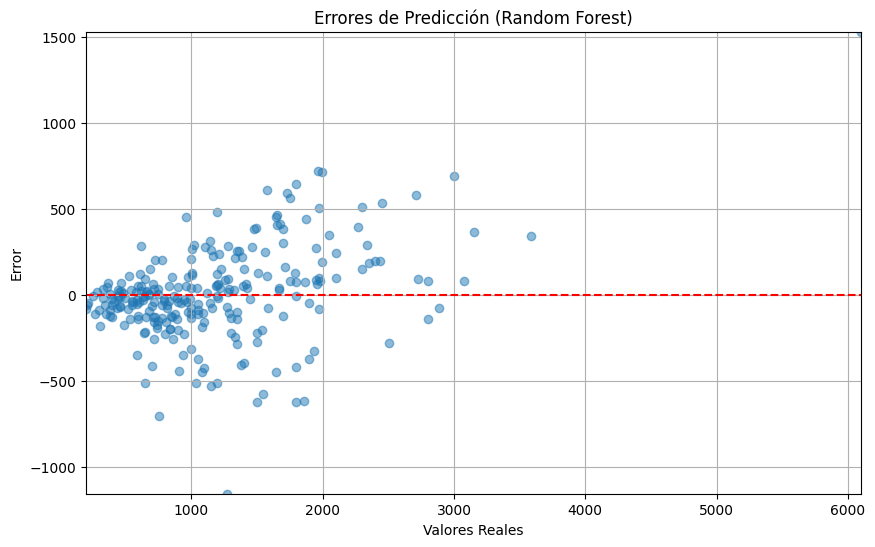

In [77]:
# Grafica de errores para random forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, df_pred_rf['Error'], alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Errores de Predicción (Random Forest)')
plt.xlabel('Valores Reales')
plt.ylabel('Error')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(df_pred_rf['Error'].min(), df_pred_rf['Error'].max())
plt.grid()
plt.show()

In [84]:
# Redes Neuronales
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate_init=0.01, max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Evaluación del modelo
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Imprimir resultados
print(f"Error Cuadrático Medio: {mean_squared_error(y_test, y_pred_mlp)}")
print(f"R²: {r2_score(y_test, y_pred_mlp)}")

Error Cuadrático Medio: 98462.61425642202
R²: 0.8016223594195021


In [85]:
# Visualización de resultados
df_pred_mlp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_mlp, 'Error': y_test - y_pred_mlp})
df_pred_mlp

,Actual,Predicted,Error
1179,650.0,701.025938,-51.025938
342,716.0,823.456963,-107.456963
649,1584.0,1536.251139,47.748861
772,1020.0,648.042544,371.957456
803,1749.0,1517.358865,231.641135
...,...,...,...
701,399.0,497.935823,-98.935823
1105,1413.1,1461.701844,-48.601844
424,2799.0,2747.011295,51.988705
944,1299.0,1254.070771,44.929229


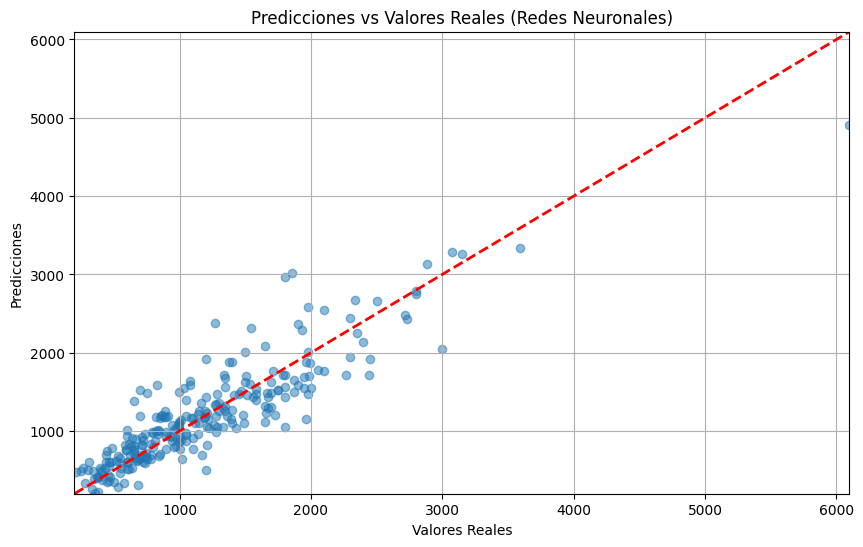

In [86]:
# Grafica de predicciones vs valores reales para MLP Redes Neuronales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicciones vs Valores Reales (Redes Neuronales)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

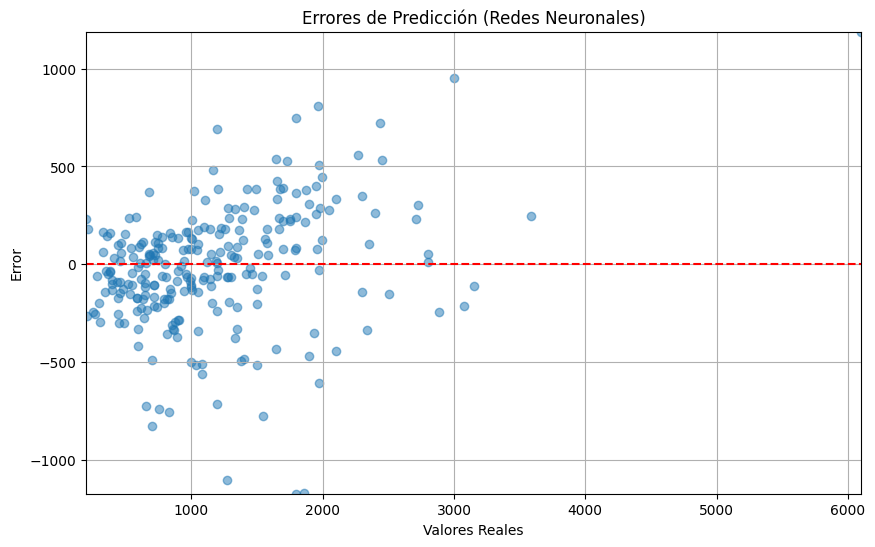

In [87]:
# Grafica de errores para MLP Redes Neuronales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, df_pred_mlp['Error'], alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Errores de Predicción (Redes Neuronales)')
plt.xlabel('Valores Reales')
plt.ylabel('Error')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(df_pred_mlp['Error'].min(), df_pred_mlp['Error'].max())
plt.grid()
plt.show()

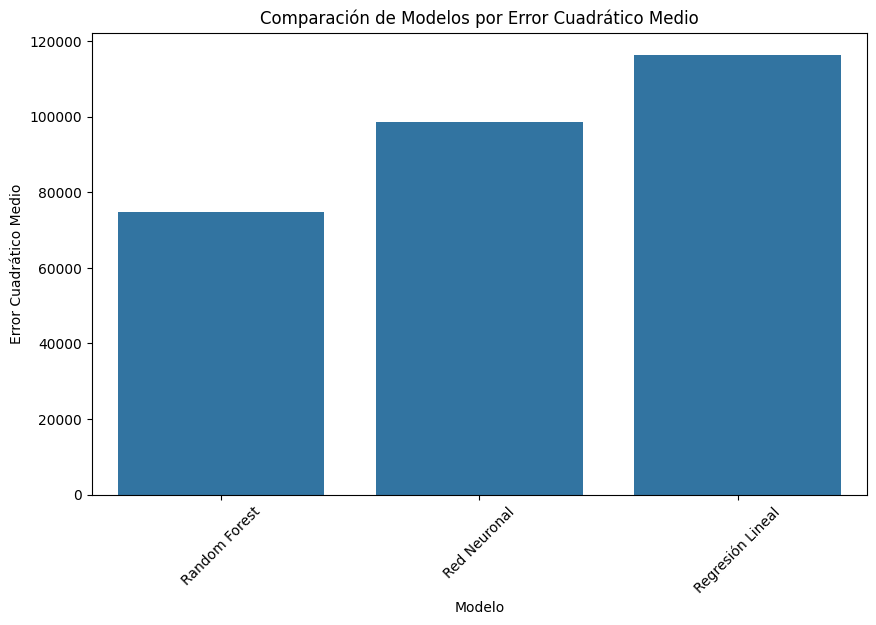

In [88]:
# Comparación de modelos regresion lineal, random forest y red neuronal por error cuadrático medio
mse = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'Red Neuronal'],
    'MSE': [mse_lr, mse_rf, mse_mlp]
})
mse = mse.sort_values(by='MSE', ascending=True)
plt.figure(figsize=(10, 6))
sns.barplot(data=mse, x='Modelo', y='MSE')
plt.title('Comparación de Modelos por Error Cuadrático Medio')
plt.ylabel('Error Cuadrático Medio')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.show()

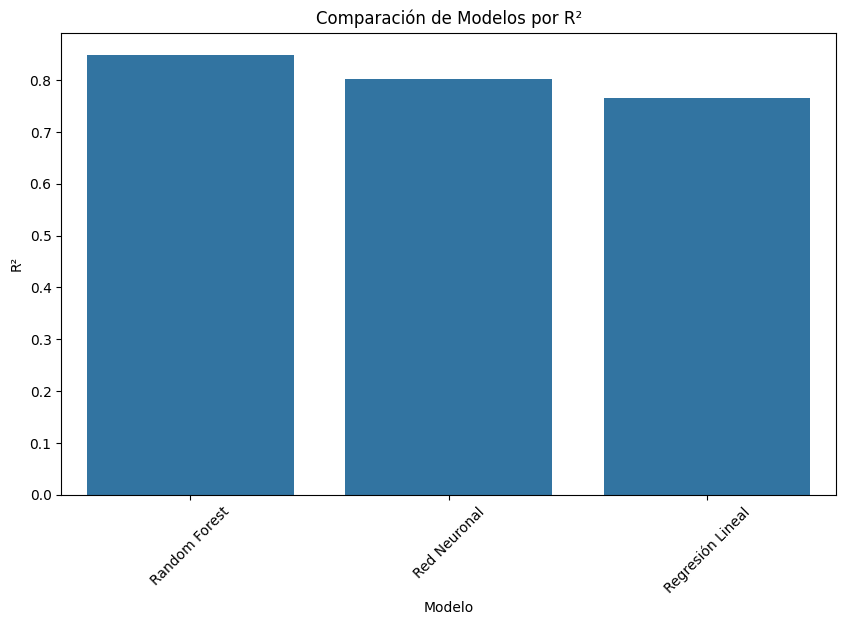

In [89]:
# Comparacion de modelos regresion lineal, random forest y red neuronal por R²
r2 = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'Red Neuronal'],
    'R²': [r2_lr, r2_rf, r2_mlp]
})
r2 = r2.sort_values(by='R²', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=r2, x='Modelo', y='R²')
plt.title('Comparación de Modelos por R²')
plt.ylabel('R²')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.show()

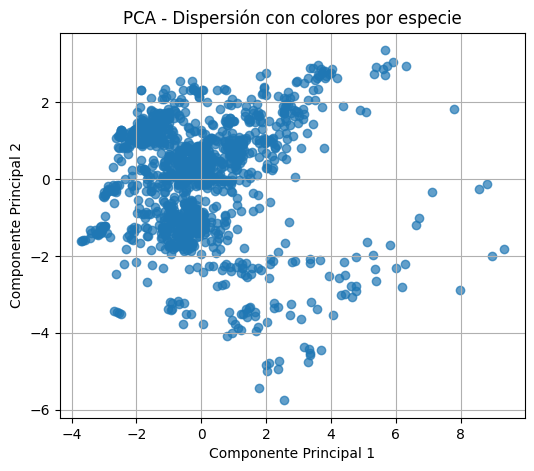

In [37]:
# Modelos No Supervisados

# Preparación de los datos

scaler = StandardScaler()

# Usar solo las columnas numéricas para el clustering
numeric_cols = ['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']

data = df[numeric_cols]
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# ----------- VISUALIZACIÓN DE PCA -----------

plt.figure(figsize=(6, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA - Dispersión con colores por especie")
plt.grid()
plt.show()

In [38]:
# KMeans Clustering

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

kmeans.fit(data_scaled)
clusters_kmeans = kmeans.labels_  

df_kmeans = data.copy()
df_kmeans['Cluster'] = clusters_kmeans
df_kmeans

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Cluster
0,13.3,8.0,1.37,1339.69,2560.0,1600.0,2.3,128.0,0.0,2
1,13.3,8.0,1.34,898.94,1440.0,900.0,1.8,128.0,0.0,0
2,15.6,8.0,1.86,575.00,1920.0,1080.0,2.5,256.0,0.0,0
3,15.4,16.0,1.83,2537.45,2880.0,1800.0,2.7,512.0,0.0,2
4,13.3,8.0,1.37,1803.60,2560.0,1600.0,3.1,256.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
1270,14.0,4.0,1.80,638.00,1920.0,1080.0,2.5,128.0,0.0,0
1271,13.3,16.0,1.30,1499.00,3200.0,1800.0,2.5,512.0,0.0,2
1272,14.0,2.0,1.50,229.00,1366.0,768.0,1.6,64.0,0.0,0
1273,15.6,6.0,2.19,764.00,1366.0,768.0,2.5,1024.0,0.0,0


In [39]:
# Análisis de características por cluster en K-Means
cluster_means_kmeans = df_kmeans.groupby('Cluster').mean()
cluster_means_kmeans

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
Cluster,,,,,,,,,
0,14.798639,6.814660,1.890657,905.117780,1747.865969,986.441885,2.227016,487.991623,3.740314
1,16.444601,13.352113,2.880005,1681.438122,1920.000000,1080.000000,2.605634,254.985915,955.436620
2,14.194393,13.177570,1.707028,2098.614486,3218.542056,1842.392523,2.378505,433.794393,162.691589


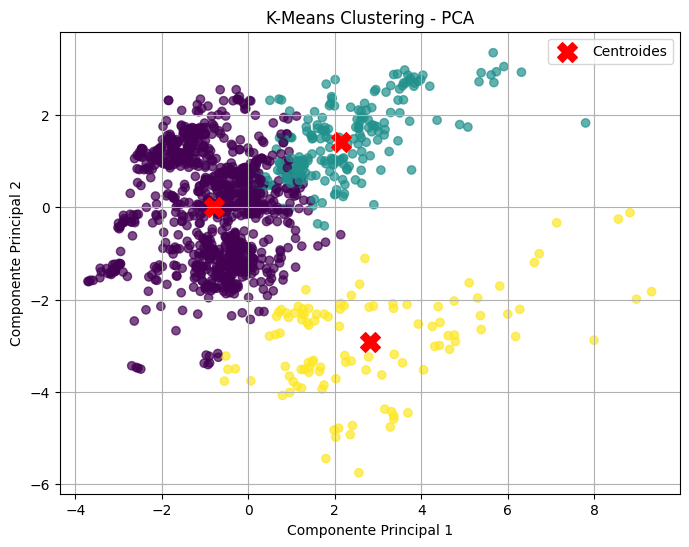

In [40]:
# Visualización de los clusters K-Means
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.7)

centroids = pca.transform(kmeans.cluster_centers_)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("K-Means Clustering - PCA")
plt.legend()
plt.grid()
plt.show()

In [41]:
# Resultados de KMeans
silhouette_kmeans = silhouette_score(data_scaled, clusters_kmeans)
print(f"Silhouette Score K-Means: {silhouette_kmeans:.4f}")
dbi_kmeans = davies_bouldin_score(data_scaled, clusters_kmeans)
print(f"Davies-Bouldin Index K-Means: {dbi_kmeans:.4f}")


Silhouette Score K-Means: 0.3470
Davies-Bouldin Index K-Means: 1.1571


In [42]:
# GMM Clustering
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42, n_init=10)
gmm.fit(data_scaled)
clusters_gmm = gmm.predict(data_scaled)

df_gmm = data.copy()
df_gmm['Cluster'] = clusters_gmm
df_gmm

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Cluster
0,13.3,8.0,1.37,1339.69,2560.0,1600.0,2.3,128.0,0.0,0
1,13.3,8.0,1.34,898.94,1440.0,900.0,1.8,128.0,0.0,0
2,15.6,8.0,1.86,575.00,1920.0,1080.0,2.5,256.0,0.0,1
3,15.4,16.0,1.83,2537.45,2880.0,1800.0,2.7,512.0,0.0,0
4,13.3,8.0,1.37,1803.60,2560.0,1600.0,3.1,256.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1270,14.0,4.0,1.80,638.00,1920.0,1080.0,2.5,128.0,0.0,1
1271,13.3,16.0,1.30,1499.00,3200.0,1800.0,2.5,512.0,0.0,1
1272,14.0,2.0,1.50,229.00,1366.0,768.0,1.6,64.0,0.0,1
1273,15.6,6.0,2.19,764.00,1366.0,768.0,2.5,1024.0,0.0,1


In [43]:
# Análisis de características por cluster en GMM
cluster_means_gmm = df_gmm.groupby('Cluster').mean()
cluster_means_gmm

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
Cluster,,,,,,,,,
0,14.209677,12.064516,1.934484,1830.178226,2707.354839,1630.129032,2.275484,332.387097,363.354839
1,14.805519,6.673289,1.895873,893.339371,1838.035320,1033.774834,2.209735,503.289183,0.000000
2,15.828664,12.925081,2.488831,1707.651564,1920.000000,1080.000000,2.583713,293.719870,657.850163


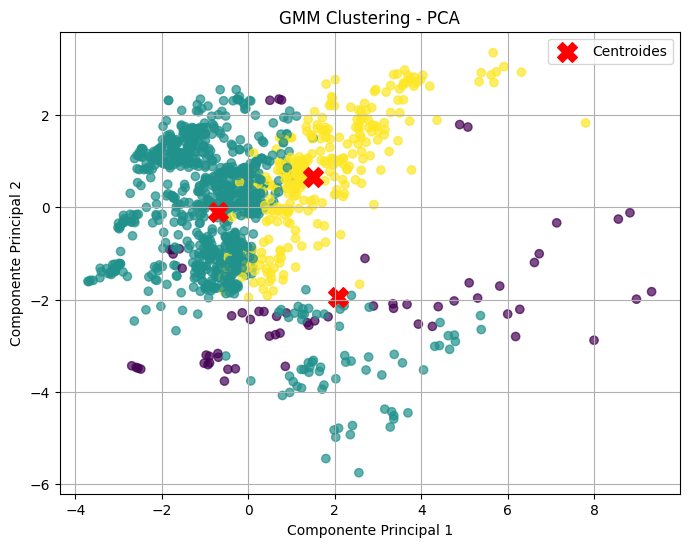

In [44]:
# Visualización de los clusters GMM
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_gmm, cmap='viridis', alpha=0.7)

centroids_gmm = pca.transform(gmm.means_)

plt.scatter(centroids_gmm[:, 0], centroids_gmm[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("GMM Clustering - PCA")
plt.legend()
plt.grid()
plt.show()

In [45]:
# Resultados de GMM
silhouette_gmm = silhouette_score(data_scaled, clusters_gmm)
print(f"Silhouette Score GMM: {silhouette_gmm:.4f}")
dbi_gmm = davies_bouldin_score(data_scaled, clusters_gmm)
print(f"Davies-Bouldin Index GMM: {dbi_gmm:.4f}")

Silhouette Score GMM: 0.2132
Davies-Bouldin Index GMM: 2.0358


In [46]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan.fit(data_scaled)
clusters_dbscan = dbscan.labels_

df_dbscan = data.copy()
df_dbscan['Cluster'] = clusters_dbscan
df_dbscan

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Cluster
0,13.3,8.0,1.37,1339.69,2560.0,1600.0,2.3,128.0,0.0,-1
1,13.3,8.0,1.34,898.94,1440.0,900.0,1.8,128.0,0.0,-1
2,15.6,8.0,1.86,575.00,1920.0,1080.0,2.5,256.0,0.0,0
3,15.4,16.0,1.83,2537.45,2880.0,1800.0,2.7,512.0,0.0,-1
4,13.3,8.0,1.37,1803.60,2560.0,1600.0,3.1,256.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...
1270,14.0,4.0,1.80,638.00,1920.0,1080.0,2.5,128.0,0.0,15
1271,13.3,16.0,1.30,1499.00,3200.0,1800.0,2.5,512.0,0.0,-1
1272,14.0,2.0,1.50,229.00,1366.0,768.0,1.6,64.0,0.0,8
1273,15.6,6.0,2.19,764.00,1366.0,768.0,2.5,1024.0,0.0,10


In [47]:
# Análisis de características por cluster en DBSCAN
cluster_means_dbscan = df_dbscan.groupby('Cluster').mean()
cluster_means_dbscan

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
Cluster,,,,,,,,,
-1,15.025773,10.395876,2.082841,1431.249588,2083.96701,1185.880412,2.282103,489.591753,228.503093
0,15.600000,7.240741,2.122324,999.203981,1920.00000,1080.000000,2.572222,245.333333,0.000000
1,13.733333,8.000000,1.561905,963.299524,1920.00000,1080.000000,1.676190,249.904762,0.000000
2,15.600000,3.968750,2.105313,506.596563,1366.00000,768.000000,2.114063,500.000000,0.000000
3,15.600000,4.000000,2.080000,454.914286,1920.00000,1080.000000,2.000000,201.142857,0.000000
4,15.600000,6.833333,2.260694,764.261250,1920.00000,1080.000000,2.580556,1024.000000,0.000000
5,15.600000,8.000000,2.327395,1123.948947,1920.00000,1080.000000,2.657895,141.473684,1024.000000
6,15.600000,7.461538,2.037308,826.268846,1920.00000,1080.000000,1.715385,256.000000,0.000000
7,15.600000,4.000000,2.127500,444.126250,1366.00000,768.000000,2.000000,1024.000000,0.000000


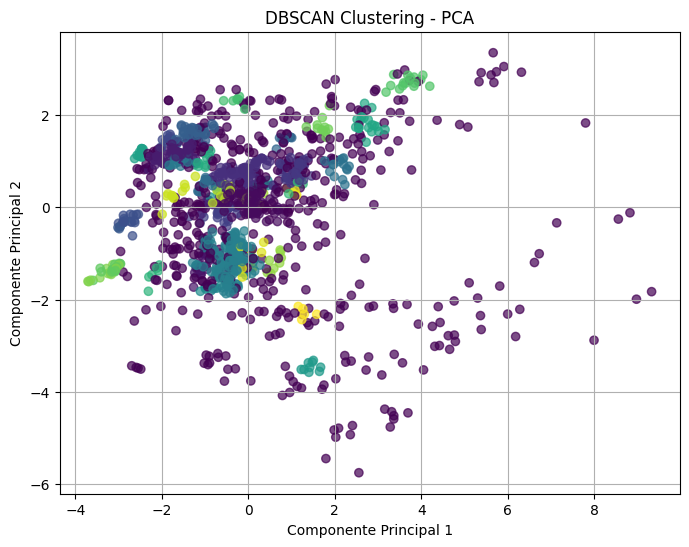

In [48]:
# Visualización de los clusters DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_dbscan, cmap='viridis', alpha=0.7)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("DBSCAN Clustering - PCA")
plt.grid()
plt.show()

In [49]:
# Resultados de DBSCAN
filtered_data = data_scaled[clusters_dbscan != -1]
filtered_clusters = clusters_dbscan[clusters_dbscan != -1]

silhouette_dbscan = silhouette_score(filtered_data, filtered_clusters)
print(f"Silhouette Score DBSCAN: {silhouette_dbscan:.4f}")
dbi_dbscan = davies_bouldin_score(filtered_data, filtered_clusters)
print(f"Davies-Bouldin Index DBSCAN: {dbi_dbscan:.4f}")


Silhouette Score DBSCAN: 0.3869
Davies-Bouldin Index DBSCAN: 0.7295


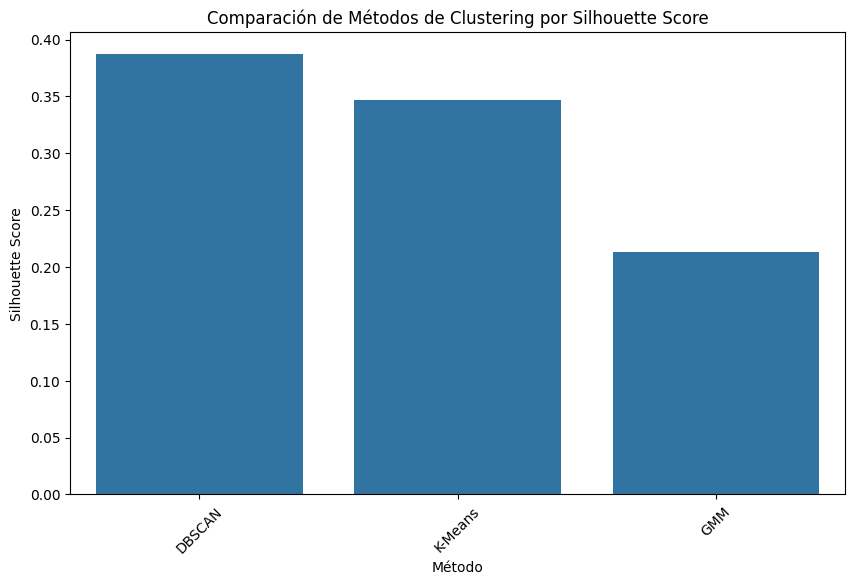

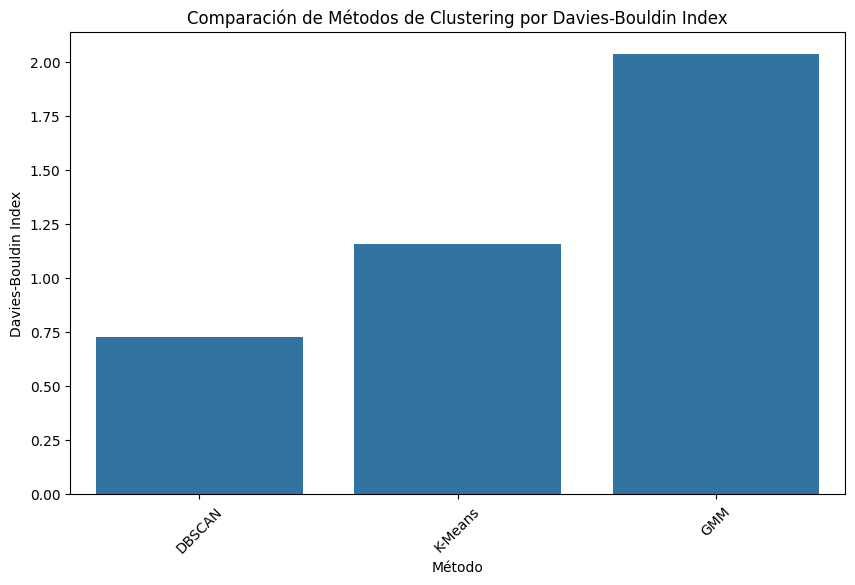

In [50]:
# Comparación de resultados de clustering por Silhouette Score
results = pd.DataFrame({
    'Método': ['K-Means', 'GMM', 'DBSCAN'],
    'Silhouette Score': [silhouette_kmeans, silhouette_gmm, silhouette_dbscan],
    'Davies-Bouldin Index': [dbi_kmeans, dbi_gmm, dbi_dbscan]
})
results = results.sort_values(by='Silhouette Score', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=results, x='Método', y='Silhouette Score')
plt.title('Comparación de Métodos de Clustering por Silhouette Score')
plt.ylabel('Silhouette Score')
plt.xlabel('Método')
plt.xticks(rotation=45)
plt.show()

# Comparación de resultados de clustering por Davies-Bouldin Index
plt.figure(figsize=(10, 6))
sns.barplot(data=results, x='Método', y='Davies-Bouldin Index')
plt.title('Comparación de Métodos de Clustering por Davies-Bouldin Index')
plt.ylabel('Davies-Bouldin Index')
plt.xlabel('Método')
plt.xticks(rotation=45)
plt.show()